In [1]:
import os
import re
import json
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from IPython.display import display

In [2]:
mpl.rcParams['font.family'] = 'DejaVu Sans'
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
pd.set_option('precision', 3)

# Load configurations and history

In [11]:
DATA = 'wm811k'

In [12]:
BACKBONE = 'resnet.18.original'

In [13]:
PRETEXT = 'pirl'

In [23]:
CHECKPOINT_ROOT = f'../checkpoints.hparams/{DATA}/{PRETEXT}/{BACKBONE}/'
assert os.path.isdir(CHECKPOINT_ROOT)

In [27]:
def get_configurations(configs, history):
    
    d = {
        'learning_rate': configs['learning_rate'],
        'weight_decay': configs['weight_decay'],
        'train_loss': history['loss']['train'],
        'valid_loss': history['loss']['valid'],
        'test_loss': history['loss']['test'],
    }

    return d

In [28]:
data = {}

for ckpt_root in os.listdir(CHECKPOINT_ROOT):
    
    # Find configuration files recursively
    config_file = os.path.join(CHECKPOINT_ROOT, ckpt_root, 'configs.json')
    print(config_file)
        
    try:
        # Open configuration file
        with open(config_file, 'r') as fp:
            configs = json.load(fp)
        # Open history file
        ckpt_dir = os.path.dirname(config_file)
        history_file = os.path.join(ckpt_dir, 'best_history.json')
        with open(history_file, 'r') as fp:
            history = json.load(fp)

    except FileNotFoundError:
        continue
        
    data[ckpt_dir] = get_configurations(configs, history)

../checkpoints.hparams/wm811k/pirl/resnet.18.original/adamw_lr_0.05_wd_0.001/configs.json
../checkpoints.hparams/wm811k/pirl/resnet.18.original/adamw_lr_0.005_wd_0.0001/configs.json
../checkpoints.hparams/wm811k/pirl/resnet.18.original/adamw_lr_0.01_wd_0.01/configs.json
../checkpoints.hparams/wm811k/pirl/resnet.18.original/adamw_lr_0.005_wd_0.01/configs.json
../checkpoints.hparams/wm811k/pirl/resnet.18.original/adamw_lr_0.05_wd_0.01/configs.json
../checkpoints.hparams/wm811k/pirl/resnet.18.original/adamw_lr_0.05_wd_0.0001/configs.json
../checkpoints.hparams/wm811k/pirl/resnet.18.original/adamw_lr_0.005_wd_0.001/configs.json
../checkpoints.hparams/wm811k/pirl/resnet.18.original/adamw_lr_0.001_wd_0.01/configs.json
../checkpoints.hparams/wm811k/pirl/resnet.18.original/adamw_lr_0.01_wd_0.001/configs.json
../checkpoints.hparams/wm811k/pirl/resnet.18.original/adamw_lr_0.001_wd_0.0001/configs.json
../checkpoints.hparams/wm811k/pirl/resnet.18.original/adamw_lr_0.001_wd_0.001/configs.json
../ch

In [29]:
print(f"Total number of experiments: {len(data):,}")

Total number of experiments: 12


In [45]:
df = pd.DataFrame.from_dict(data, orient='index')
df = df.reset_index(drop=True, inplace=False)
df = df.pivot_table(values=['train_loss', 'valid_loss', 'test_loss'], index=['learning_rate', 'weight_decay'])
display(df)

test_loss  train_loss  valid_loss
learning_rate weight_decay                                   
0.001         1.000e-04         0.800       1.746       0.791
              1.000e-03         0.636       1.724       0.631
              1.000e-02         0.737       1.768       0.769
0.005         1.000e-04         1.531       2.239       1.525
              1.000e-03         1.627       2.341       1.768
              1.000e-02         1.533       2.221       1.524
0.010         1.000e-04         1.510       2.145       1.543
              1.000e-03         1.254       2.023       1.244
              1.000e-02         1.560       2.188       1.558
0.050         1.000e-04         1.417       2.069       1.433
              1.000e-03         1.268       2.108       1.297
              1.000e-02         1.141       2.334       1.189

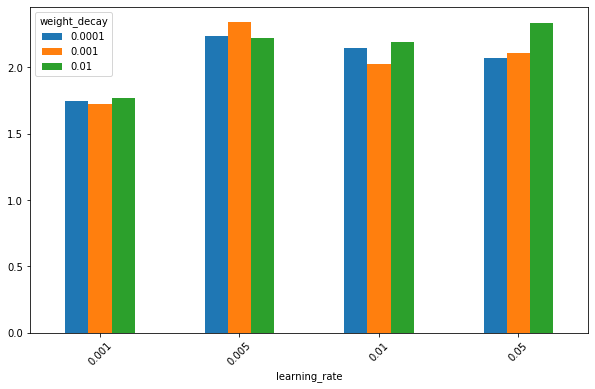

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
df.unstack().plot.bar(y='train_loss', rot=45, ax=ax)
plt.show(fig)